<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 2: Generate descriptive statistics and visualizations

### For all visualizations, please include a title in each graph and appropriate labels
### Generate the following and explain your findings:
##### 1. For the "Median value of owner-occupied homes" provide a boxplot
##### 2. Provide a  bar plot for the Charles river variable
##### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
##### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
##### 5. Create a histogram for the pupil to teacher ratio variable

### 1. Boxplot for The Median Value of Owner Occupied Homes

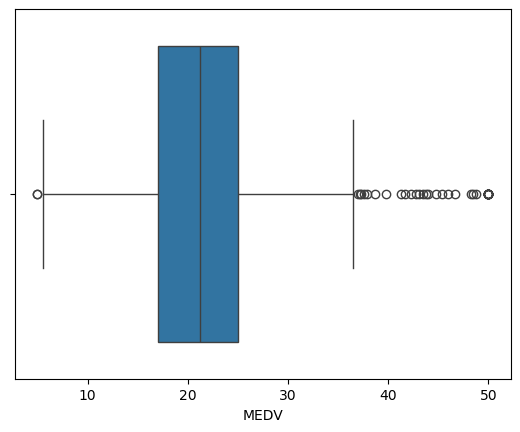

In [9]:
ax = sns.boxplot(x='MEDV', data = boston_df)

The median value of the owner-occupied homes in this dataset is close to 21.

### 2. Bar Plot for The Charles River Variable 

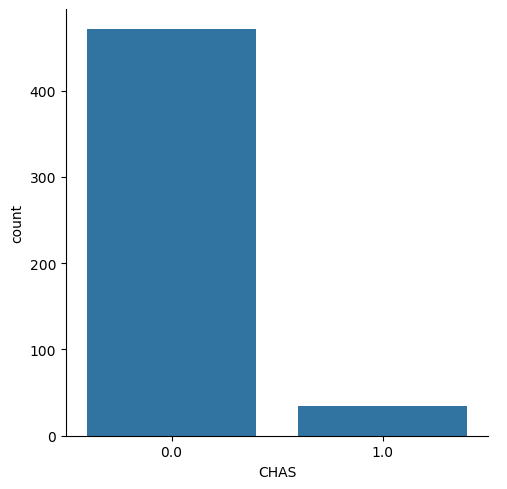

In [11]:
sns.catplot(x='CHAS', kind='count', data = boston_df)

This shows that most houses are not near the river.

### 3. Boxplot for The MEDV Variable vs The AGE Variable

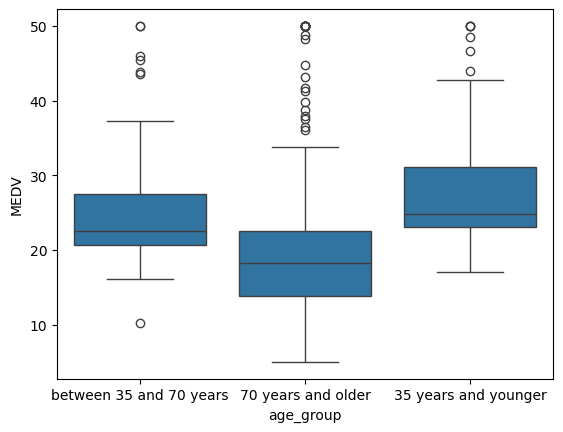

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)

Home values are higher on average for younger homeowners. 

### 4. Scatter Plot to Show The Relationship Between Nitric Oxide Concentrations and The Proportion of Non-retail Business Acres Per Town

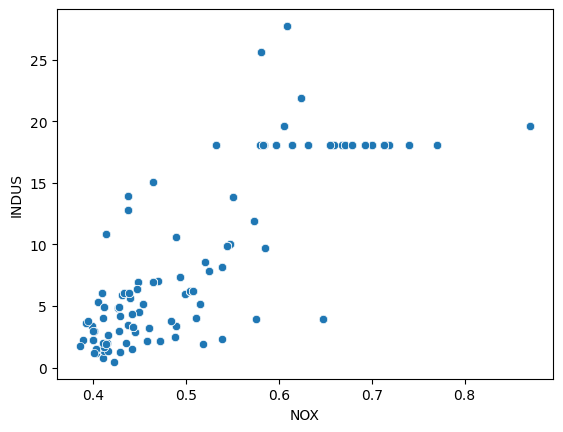

In [13]:
ax = sns.scatterplot(x='NOX', y='INDUS',  data=boston_df)

The graph displays a positive correlation between NOX and INDUS.

### 5. Histogram for The Pupil to Teacher Ratio Variable

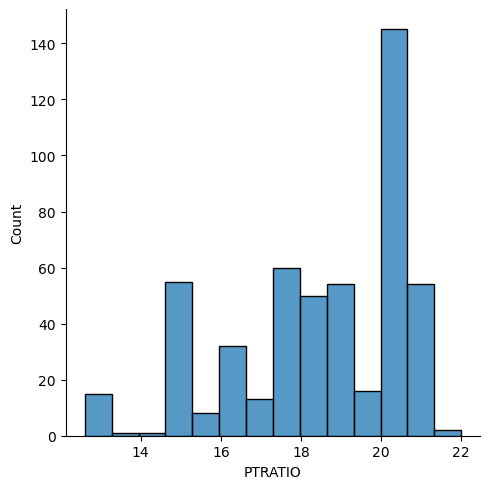

In [14]:
ax = sns.displot(boston_df['PTRATIO'], kde = False)

There is a skewed distribution showing most schools have a higher pupil-to-teacher ratio.

# Task 3: Use the appropriate tests the answer the questions provided

### For each of the following questions;
##### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
##### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
##### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
##### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### Be sure to:
##### State your hypothesis.
##### Use α = 0.05
##### Perform the test Statistics.
##### State the conclusion from the test.


## Question 1.

#### Hypotheses:
Null hypothesis: µ1 = µ2 (there is no difference in median value of houses bounded by the Charles river)

Alternate hypothesis: µ1 ≠ µ2 ("there is a difference in median value of houses bounded by the Charles river")

In [16]:
import scipy.stats

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [17]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

#### Answer:

Since the p-value is less than 0.05 we reject the null hypothesis as there is sufficent proof of a difference in median values of homes based on Charles River variable.

## Question 2.

#### Hypotheses:

Null hypothesis: µ1 = µ2 = µ3 (the three means are equal)

Alternate hypothesis: At least one of the means differ

In [18]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [20]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [21]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Answer:

Since the p-value is less than 0.05, we reject the null hypothesis as there is a significant evidence that at least one of the means differ.

## Question 3.

#### Hypotheses:

Null hypothesis: both do not correlate

Alternate hypothesis: both do correlate

In [23]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Answer: 

Since the p-value is less than 0.05 we reject the null hypothesis and conclude that there is a relationship between NOX and INDUS.

## Question 4.

#### Hypotheses

Null: Dis is not correlated with MEDV

Alternate: Dis is correlated with MEDV

In [24]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        15:56:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Answer:

Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between DIS and MEDV.